# splot.pysal.lib: assessing neigbors & spatial weights

In spatial analysis workflows it is often important and necessary to asses the relationships of neighbouring polygons. `pysal.lib` and `splot` can help you to inspect if two neighbouring polygons share an edge or not. 

**Content**:
* Imports
* Data Preparation
* Plotting

## Imports

In [1]:
from pysal.lib.weights.contiguity import Queen
import pysal.lib
from pysal.lib import examples
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline

In [2]:
from pysal.viz.splot.pysal.lib import plot_spatial_weights

## Data Preparation

Let's first have a look at the dataset with `pysal.lib.examples.explain`

In [3]:
examples.explain('rio_grande_do_sul')

{'name': 'Rio_Grande_do_Sul',
 'description': 'Cities of the Brazilian State of Rio Grande do Sul',
 'explanation': ['* 43MUE250GC_SIR.dbf: attribute data (k=2)',
  '* 43MUE250GC_SIR.shp: Polygon shapefile (n=499)',
  '* 43MUE250GC_SIR.shx: spatial index',
  '* 43MUE250GC_SIR.cpg: encoding file ',
  '* 43MUE250GC_SIR.prj: projection information ',
  '* map_RS_BR.dbf: attribute data (k=3)',
  '* map_RS_BR.shp: Polygon shapefile (no lakes) (n=497)',
  '* map_RS_BR.prj: projection information',
  '* map_RS_BR.shx: spatial index',
  'Source: Renan Xavier Cortes <renanxcortes@gmail.com>',
  'Reference: https://github.com/pysal/pysal/issues/889#issuecomment-396693495']}

Load data into a `geopandas` geodataframe

In [4]:
gdf = gpd.read_file(examples.get_path('map_RS_BR.shp'))
gdf.head()

,NM_MUNICIP,CD_GEOCMU,geometry
0,ACEGUÁ,4300034,POLYGON ((-54.10940375660775 -31.4331615329298...
1,ÁGUA SANTA,4300059,POLYGON ((-51.98932089399999 -28.1294290447850...
2,AGUDO,4300109,POLYGON ((-53.13695617099998 -29.4948277498090...
3,AJURICABA,4300208,POLYGON ((-53.61993058200001 -28.1456914857853...
4,ALECRIM,4300307,POLYGON ((-54.77812739300882 -27.5837166490823...


In [5]:
weights = Queen.from_dataframe(gdf)

/Users/steffie/code/pysal.lib/pysal.lib/weights/weights.py:168: UserWarning: There are 29 disconnected observations 
  Island ids: 0, 4, 23, 27, 80, 94, 101, 107, 109, 119, 122, 139, 169, 175, 223, 239, 247, 253, 254, 255, 256, 261, 276, 291, 294, 303, 321, 357, 374
  " Island ids: %s" % ', '.join(str(island) for island in self.islands))


This warning tells us that our dataset contains islands. Islands are polygons that do not share edges and nodes with adjacent polygones. This can for example be the case if polygones are truly not neighbouring, eg. when two land parcels are seperated by a river. However, these islands often stems from human error when digitizing features into polygons. 

This unwanted error can be assessed using `splot.pysal.lib` `plot_spatial_weights` functionality:

### Plotting

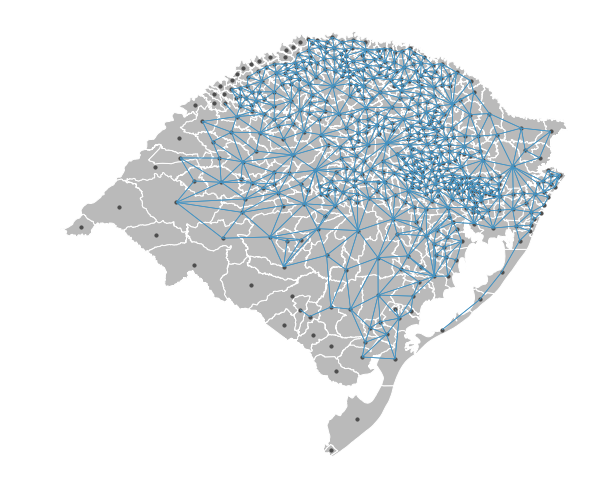

In [6]:
plot_spatial_weights(weights, gdf)
plt.show()

This visualisation depicts the spatial weights network, a network of connections of the centroid of each polygon to the centroid of its neighbour. As we can see, there are many polygons in the south and west of this map, that are not connected to it's neighbors. This stems from digitization errors and needs to be corrected before we can start our statistical analysis. 

`pysal.lib` offers a tool to correct this error by 'snapping' incorrectly separated neighbours back together:

In [7]:
wnp = pysal.lib.weights.util.nonplanar_neighbors(weights, gdf)

We can now visualise if the `nonplanar_neighbors` tool adjusted all errors correctly:

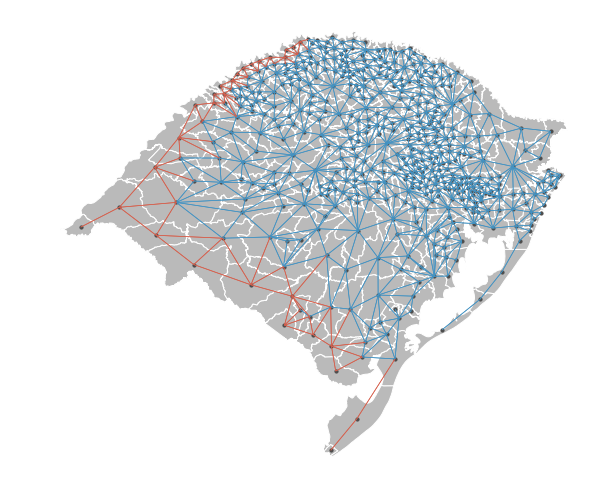

In [8]:
plot_spatial_weights(wnp, gdf)
plt.show()

The visualization shows that all erroneous islands are now stored as neighbors in our new weights object, depicted by the new joins displayed in orange.

We can now adapt our visualization to show all joins in the same color, by using the `nonplanar_edge_kws` argument in `plot_spatial_weights`:

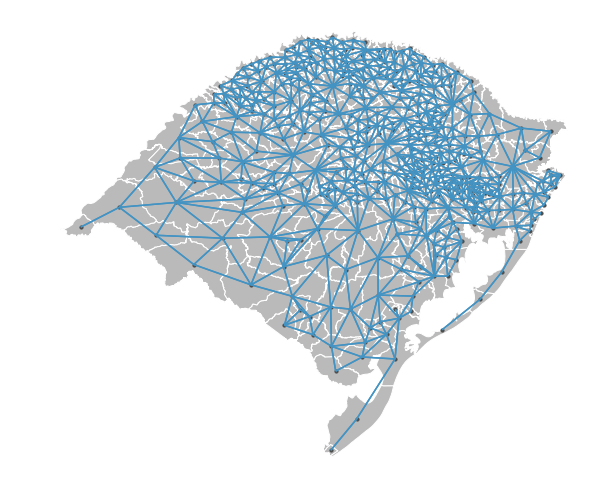

In [9]:
plot_spatial_weights(wnp, gdf, nonplanar_edge_kws=dict(color='#4393c3'))
plt.show()